# **TASK 4:EMAIL SPAM DETECTION WITH MACHINE LEARNING**

**Question ?????......** Weve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.
In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam. Lets get started!

**1. Importing Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

**Explaination Importing Libraries**

1.	pandas as pd: For data manipulation and analysis (loading, cleaning, etc.).
2.	sklearn.model_selection import train_test_split: For splitting data into training and testing sets.
3.	sklearn.feature_extraction.text import TfidfVectorizer: For transforming text data into numerical features using TF-IDF.
4.	sklearn.naive_bayes import MultinomialNB: To build a Naive Bayes model, suitable for text classification.
5.	sklearn.pipeline import Pipeline: To create a workflow for preprocessing and modeling steps.
6.	sklearn.model_selection import GridSearchCV: For hyperparameter tuning using cross-validation.
7.	nltk: The Natural Language Toolkit for text processing tasks.
8.	re: For regular expressions, useful for cleaning text data.
9.	nltk.corpus import stopwords: To remove common words (like "the," "a," "is") that don't contribute much to meaning.
10.	nltk.stem import PorterStemmer: To reduce words to their root forms (e.g., "running" becomes "run").
11.	seaborn as sns: For creating aesthetically pleasing visualizations (like heatmaps).
12.	matplotlib.pyplot as plt: For plotting graphs and charts.
13.	wordcloud import WordCloud: To generate word clouds for visualizing the most frequent words.
14.	sklearn.metrics import confusion_matrix, accuracy_score, classification_report: For evaluating the model's performance.
15.	google.colab import drive: For accessing Google Drive (used to load the data).



**2. Downloading NLTK Resources**

In [ ]:
# Download NLTK resources (run once)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Explaination ofDownloading NLTK Resources**

nltk.download('stopwords') and nltk.download('punkt'): These download necessary NLTK resources, including the list of stopwords and the Punkt sentence tokenizer, which are needed for text processing.

**3. Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Explaination of Mounting Google Drive**


drive.mount('/content/drive'): This allows you to access the dataset stored on your Google Drive

**4. Loading and Exploring the Dataset**

In [ ]:
# 1. Load and Explore the Dataset
file_path = ('/content/drive/MyDrive/Dataset/spam.csv')
data = pd.read_csv(file_path, encoding='latin-1')
# Print original column names for inspection
print("Original Column Names:", data.columns)

# Drop unnecessary columns if needed, or rename all columns
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
# Alternatively, rename all columns:
# data.columns = ['label', 'text', 'col3', 'col4', 'col5']  # Replace 'col3', 'col4', 'col5' with actual names if needed

# Correctly rename the remaining columns if you dropped some
data.columns = ['label', 'text']

print(data.head())

Original Column Names: Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


**Explaination Loading and Exploring the Dataset**


1.	file_path = ('/content/drive/MyDrive/Dataset/spam.csv'): Sets the path to your CSV file containing the email data.
2.	data = pd.read_csv(file_path, encoding='latin-1'): Loads the dataset into a Pandas DataFrame, using 'latin-1' encoding to handle potential character encoding issues.
3.	print("Original Column Names:", data.columns): Displays the original column names for inspection.
4.	data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']): Drops unnecessary columns if present.
5.	data.columns = ['label', 'text']: Renames the columns to 'label' (spam/ham) and 'text'.
6.	print(data.head()): Shows the first few rows of the data for a quick look.



**5. Preprocessing Text Data**

In [ ]:
# 2. Preprocess the Text Data
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation
    words = nltk.word_tokenize(text)
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

data['processed_text'] = data['text'].apply(preprocess_text)
print("\nProcessed Data:")
print(data.head())


Processed Data:
  label                                               text  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                      processed_text  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri wkli comp win fa cup final tkt st m...  
3                u dun say earli hor u c alreadi say  
4          nah dont think goe usf live around though  


**Explaination of Preprocessing Text Data**


1.	stop_words = set(stopwords.words('english')): Creates a set of English stop words.
2.	stemmer = PorterStemmer(): Initializes a PorterStemmer object for stemming words.
3.	def preprocess_text(text):: Defines a function to preprocess each email:
o	text = text.lower(): Converts text to lowercase.
o	text = re.sub(r'[^a-zA-Z\s]', '', text): Removes punctuation using regular expressions.
o	words = nltk.word_tokenize(text): Splits the text into individual words.
o	words = [stemmer.stem(word) for word in words if word not in stop_words]: Stems each word and removes stop words.
o	return ' '.join(words): Joins the processed words back into a string.
4.	data['processed_text'] = data['text'].apply(preprocess_text): Applies the preprocess_text function to each email in the 'text' column and stores the result in a new 'processed_text' column.
5.	print("\nProcessed Data:"): Prints the first few rows of the data with the preprocessed text.



**6. Feature Extraction (TF-IDF)**

In [ ]:
# 3. Feature Extraction (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)

**Explaination Feature Extraction (TF-IDF)**

vectorizer = TfidfVectorizer(max_features=5000): Creates a TF-IDF vectorizer, which will consider the top 5000 most frequent words in the dataset when converting text into numerical features.

**7. Train-Test Split**

In [ ]:
# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(data['processed_text'], data['label'], test_size=0.2, random_state=42)

**Explaination Train - Test Split**

X_train, X_test, y_train, y_test = train_test_split(data['processed_text'], data['label'], test_size=0.2, random_state=42): Splits the data into training and testing sets (80% for training, 20% for testing). random_state=42 ensures consistent splitting across runs.

**8. Model Training (Grid Search with Cross-Validation)**

In [ ]:
# 5. Model Training (Grid Search with Cross-Validation)
# Define the model and its hyperparameters
model = MultinomialNB()  # Use Multinomial Naive Bayes

param_grid = {
    'model__alpha': [0.1, 1, 10]  # Hyperparameters for Multinomial Naive Bayes
}

# Create the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('model', model)
])

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and its accuracy
best_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_

print("Best Model:", best_model)
print("Best Accuracy:", best_accuracy)

Best Model: Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('model', MultinomialNB(alpha=0.1))])
Best Accuracy: 0.9798057807773801


**Explaination 8. Model Training (Grid Search with Cross-Validation)**

1.	model = MultinomialNB(): Defines a Multinomial Naive Bayes model.
2.	param_grid = { 'model__alpha': [0.1, 1, 10] }: Specifies the hyperparameters to tune (the smoothing parameter 'alpha' for Naive Bayes).
3.	pipeline = Pipeline([('tfidf', TfidfVectorizer(max_features=5000)), ('model', model)]): Creates a pipeline that first applies TF-IDF and then trains the Naive Bayes model.
4.	grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy'): Initializes a GridSearchCV object to find the best hyperparameters using 5-fold cross-validation.
5.	grid_search.fit(X_train, y_train): Trains the model on the training data.
6.	best_model = grid_search.best_estimator_: Retrieves the best performing model from the grid search.
7.	best_accuracy = grid_search.best_score_: Gets the accuracy of the best model.



**9. Model Evaluation**

In [ ]:
# 6. Model Evaluation
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9838565022421525


**Explaination Model Evaluation**

•	y_pred = best_model.predict(X_test): Predicts the labels (spam/ham) for the test data.

•	accuracy = accuracy_score(y_test, y_pred): Calculates the accuracy of the model.

•	print("Accuracy:", accuracy): Prints the accuracy.


**10. Visualizations**

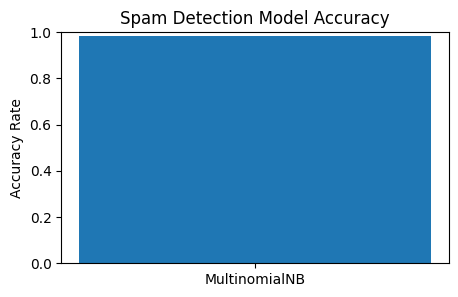

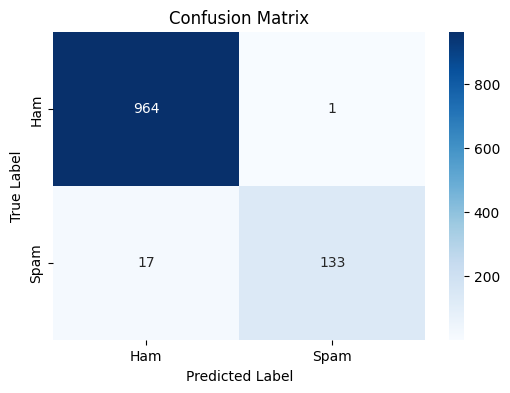

Accuracy: 0.9838565022421525
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
# Visualization: Accuracy Bar Chart with Model Name
model_name = type(best_model['model']).__name__  # Get the model name
plt.figure(figsize=(5, 3))
plt.bar([model_name], [accuracy])
plt.ylabel('Accuracy Rate')
plt.title('Spam Detection Model Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to 0-1 (for percentage)
plt.show()

# Visualization 1: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print(classification_report(y_test, y_pred))

**Explaination Visualizations**

•	Accuracy Bar Chart: Plots a bar chart showing the accuracy of the best model.

•	Confusion Matrix: Creates a heatmap to visualize how well the model predicts spam and ham.

•	Classification Report: Prints a report with precision, recall, F1-score, and support for each class (spam and ham).



**11. Test with New Email**

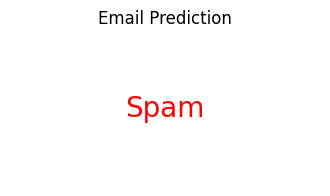

In [ ]:
# 7. Test with New Email
new_email = ["Congratulations! You've won a free vacation to the Bahamas!"]
prediction = best_model.predict(new_email)

# Visualization 2: Prediction Result
if prediction[0] == 'spam':
    result = "Spam"
    color = 'red'
else:
    result = "Ham"
    color = 'green'

plt.figure(figsize=(4, 2))
plt.text(0.5, 0.5, result, ha='center', va='center', fontsize=20, color=color)
plt.axis('off')
plt.title('Email Prediction')
plt.show()

**Explaination Test with New Email**

1.	new_email = ["Congratulations! You've won a free vacation to the Bahamas!"]: Creates a new email to test the model.
2.	prediction = best_model.predict(new_email): Predicts the class (spam/ham) of the new email.
3.	if prediction[0] == 'spam':: Checks the prediction and displays a result accordingly.


**12. Word Clouds**

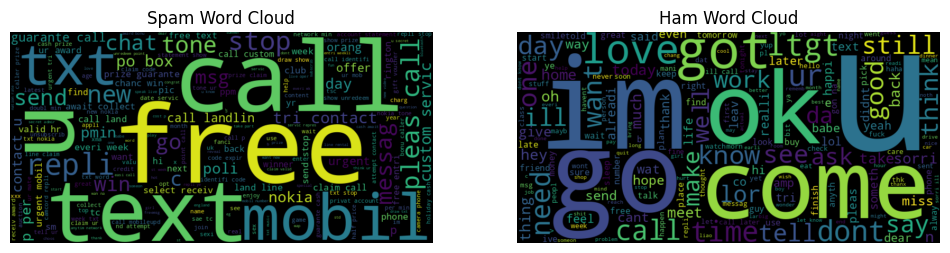

In [ ]:
# Create word clouds for spam and ham
spam_words = ' '.join(data[data['label'] == 'spam']['processed_text'])
ham_words = ' '.join(data[data['label'] == 'ham']['processed_text'])

spam_wordcloud = WordCloud(width=800, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=800, height=400).generate(ham_words)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')

plt.show()

**Explaination  Word Clouds**


Creates word clouds to visualize the most common words in spam and ham emails. This helps to understand the patterns in the data.

---



**Out Put results **


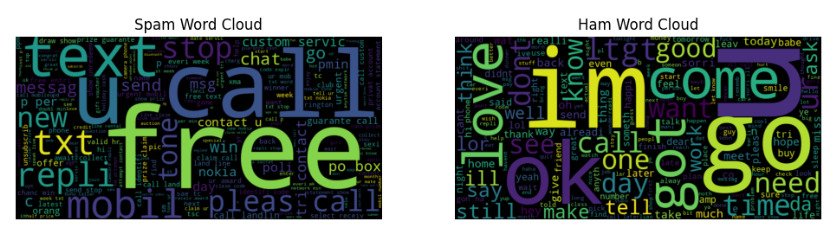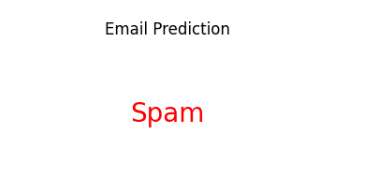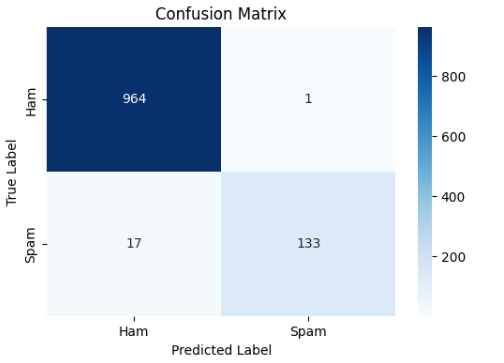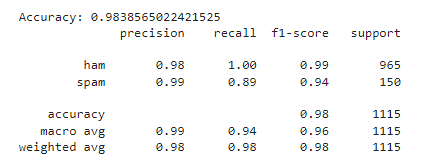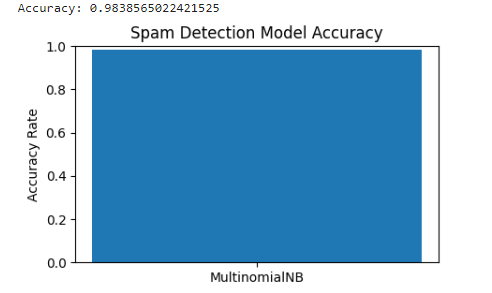

**FULL CODE**

---



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Original Column Names: Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Processed Data:
  label                                               text  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                          

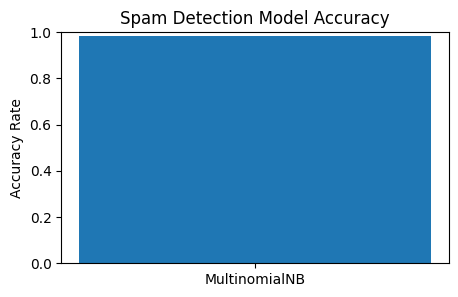

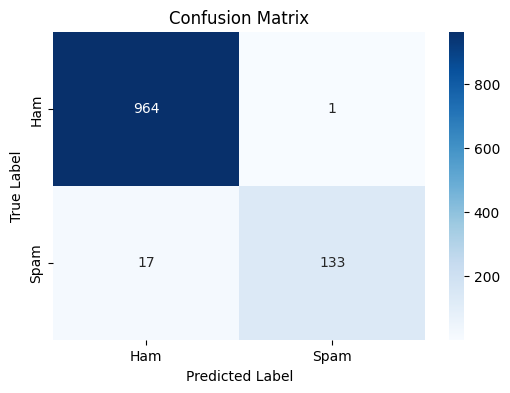

Accuracy: 0.9838565022421525
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



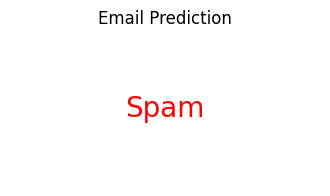

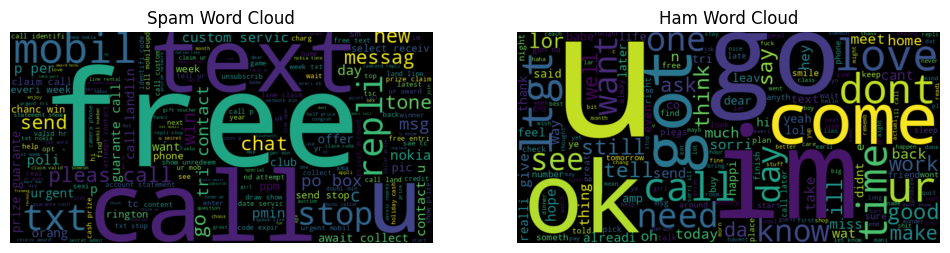

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Download NLTK resources (run once)
nltk.download('stopwords')
nltk.download('punkt')

from google.colab import drive
drive.mount('/content/drive')

# 1. Load and Explore the Dataset
file_path = ('/content/drive/MyDrive/Dataset/spam.csv')
data = pd.read_csv(file_path, encoding='latin-1')
# Print original column names for inspection
print("Original Column Names:", data.columns)

# Drop unnecessary columns if needed, or rename all columns
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
# Alternatively, rename all columns:
# data.columns = ['label', 'text', 'col3', 'col4', 'col5']  # Replace 'col3', 'col4', 'col5' with actual names if needed

# Correctly rename the remaining columns if you dropped some
data.columns = ['label', 'text']

print(data.head())

# 2. Preprocess the Text Data
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation
    words = nltk.word_tokenize(text)
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

data['processed_text'] = data['text'].apply(preprocess_text)
print("\nProcessed Data:")
print(data.head())

# 3. Feature Extraction (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(data['processed_text'], data['label'], test_size=0.2, random_state=42)

# 5. Model Training (Grid Search with Cross-Validation)
# Define the model and its hyperparameters
model = MultinomialNB()  # Use Multinomial Naive Bayes

param_grid = {
    'model__alpha': [0.1, 1, 10]  # Hyperparameters for Multinomial Naive Bayes
}

# Create the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('model', model)
])

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and its accuracy
best_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_

print("Best Model:", best_model)
print("Best Accuracy:", best_accuracy)

# 6. Model Evaluation
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualization: Accuracy Bar Chart with Model Name
model_name = type(best_model['model']).__name__  # Get the model name
plt.figure(figsize=(5, 3))
plt.bar([model_name], [accuracy])
plt.ylabel('Accuracy Rate')
plt.title('Spam Detection Model Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to 0-1 (for percentage)
plt.show()

# Visualization 1: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print(classification_report(y_test, y_pred))

# 7. Test with New Email
new_email = ["Congratulations! You've won a free vacation to the Bahamas!"]
prediction = best_model.predict(new_email)

# Visualization 2: Prediction Result
if prediction[0] == 'spam':
    result = "Spam"
    color = 'red'
else:
    result = "Ham"
    color = 'green'

plt.figure(figsize=(4, 2))
plt.text(0.5, 0.5, result, ha='center', va='center', fontsize=20, color=color)
plt.axis('off')
plt.title('Email Prediction')
plt.show()

# Create word clouds for spam and ham
spam_words = ' '.join(data[data['label'] == 'spam']['processed_text'])
ham_words = ' '.join(data[data['label'] == 'ham']['processed_text'])

spam_wordcloud = WordCloud(width=800, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=800, height=400).generate(ham_words)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')

plt.show()